本文主要讨论如下数学工具在Python中的实现：
* 近似：回归和插值是金融中常用的数值技术
* 凸优化：介绍金融学科所需要的凸优化技术（例如期权定价与模型校准）
* 积分：特别的，为金融衍生产品估值通常需要对积分进行计算
* 符号数学：Python提供了SymPy包处理符号数学的问题，例如求解方程组

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

整个分析中，函数都是基于$$sin(x)+0.5x$$
主要的关注点是在给定的区间上对函数进行近似值求解，方法是多项式回归和插值

# 函数近似

In [3]:
def f(x):
    return np.sin(x)+0.5*x

Text(0,0.5,'f(x)')

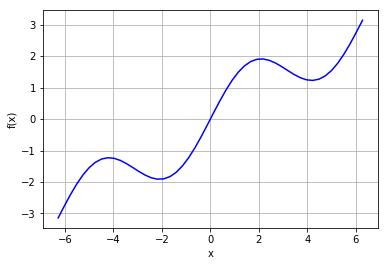

In [5]:
x=np.linspace(-2*np.pi,2*np.pi,50)#感兴趣的区间是(-2pi,2pi)
plt.plot(x,f(x),'b')
plt.grid(True)
plt.xlabel('x')
plt.ylabel('f(x)')

回归的任务是在给定一组基函数$b_d$，$d∈\{1,…,D\}$ 的情况下，根据下面的公式找出最优参数$\alpha_1^*$,...,$\alpha_D^*$，其中对于$i∈\{1,…I\}$的观察点，$y_i=f(x_i)$:
$$argmin\frac{1}{I}\sum_{i=1}^{I}(y_i-\sum_{d=1}^{D}\alpha_d b_d(x_i))^2$$


单项式作为基函数，是多项式回归分析的最简单的形式，形如$b_1=1$，$b_2=x$，$b_3=x^2$，...，在这种情况下，numpy中有一些函数(ployfit)可以用于确定最优的$\alpha_i$，并且，在给定$x_i$，确定最优参数之后，可以计算近似的函数值(ployval)。

* 多项式回归近似（次数为1）

In [10]:
reg=np.polyfit(x,f(x),deg=1)#polyfit的参数，x:x坐标（自变量的值，linspace之后的值）,y:y坐标（因变量的值),deg拟合多项式的次数
#full(如果是true，那么还会返回调试信息),w(应用于y坐标的权重),cov(如果是true，还返回协方差矩阵)
reg

array([ 4.28841952e-01, -5.29906205e-17])

In [11]:
ry=np.polyval(reg,x)#返回的是多项式回归的函数近似值

In [12]:
ry

array([-2.69449345, -2.58451412, -2.4745348 , -2.36455548, -2.25457615,
       -2.14459683, -2.0346175 , -1.92463818, -1.81465885, -1.70467953,
       -1.5947002 , -1.48472088, -1.37474156, -1.26476223, -1.15478291,
       -1.04480358, -0.93482426, -0.82484493, -0.71486561, -0.60488628,
       -0.49490696, -0.38492764, -0.27494831, -0.16496899, -0.05498966,
        0.05498966,  0.16496899,  0.27494831,  0.38492764,  0.49490696,
        0.60488628,  0.71486561,  0.82484493,  0.93482426,  1.04480358,
        1.15478291,  1.26476223,  1.37474156,  1.48472088,  1.5947002 ,
        1.70467953,  1.81465885,  1.92463818,  2.0346175 ,  2.14459683,
        2.25457615,  2.36455548,  2.4745348 ,  2.58451412,  2.69449345])

Text(0,0.5,'f(x)')

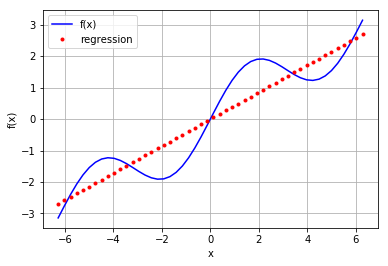

In [13]:
plt.plot(x,f(x),'b',label='f(x)')
plt.plot(x,ry,'r.',label='regression')
plt.legend(loc=0)
plt.grid(True)
plt.xlabel('x')
plt.ylabel('f(x)')

* 多项式回归近似（次数为5)

In [14]:
reg=np.polyfit(x,f(x),deg=5)
reg

array([ 1.37920761e-03,  2.68253446e-18, -6.82525072e-02, -4.72240885e-19,
        1.11425209e+00, -3.22330191e-17])

In [15]:
ry=np.polyval(reg,x)
ry

array([-3.57707312, -2.74058791, -2.13926912, -1.73143815, -1.47954747,
       -1.34999701, -1.31295056, -1.34215217, -1.41474255, -1.51107546,
       -1.61453411, -1.71134755, -1.79040708, -1.84308265, -1.86303923,
       -1.84605324, -1.78982892, -1.69381474, -1.55901981, -1.38783025,
       -1.18382559, -0.95159519, -0.69655463, -0.4247621 , -0.14273476,
        0.14273476,  0.4247621 ,  0.69655463,  0.95159519,  1.18382559,
        1.38783025,  1.55901981,  1.69381474,  1.78982892,  1.84605324,
        1.86303923,  1.84308265,  1.79040708,  1.71134755,  1.61453411,
        1.51107546,  1.41474255,  1.34215217,  1.31295056,  1.34999701,
        1.47954747,  1.73143815,  2.13926912,  2.74058791,  3.57707312])

Text(0,0.5,'f(x)')

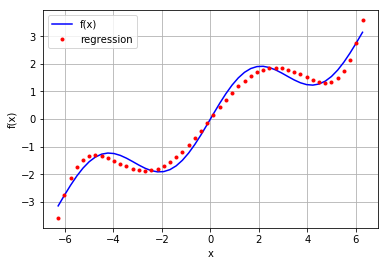

In [16]:
plt.plot(x,f(x),'b',label='f(x)')
plt.plot(x,ry,'r.',label='regression')
plt.legend(loc=0)
plt.grid(True)
plt.xlabel('x')
plt.ylabel('f(x)')

* 多项式回归近似（次数为7)

Text(0,0.5,'f(x)')

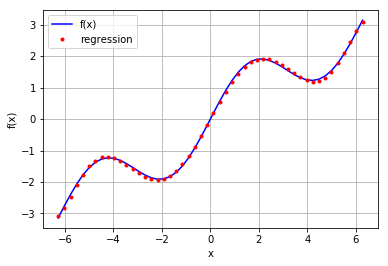

In [17]:
reg=np.polyfit(x,f(x),deg=7)
reg
ry=np.polyval(reg,x)
ry
plt.plot(x,f(x),'b',label='f(x)')
plt.plot(x,ry,'r.',label='regression')
plt.legend(loc=0)
plt.grid(True)
plt.xlabel('x')
plt.ylabel('f(x)')

In [18]:
np.allclose(f(x),ry)#使用np.allclose()检测两个矩阵是否相同

False

In [19]:
np.sum((f(x)-ry)**2)/len(x)#求误差总和

0.00177691347595176

* 一般的，你可以通过自行定义更好的基函数集合来获得更好的效果。在这种情况下，个体的基函数必须通过矩阵方法来定义（也就是通过NumPy的ndarray对象）。例如，我们首先创建直到3次的单项式组成矩阵，numpy.linalg提供了lstsq函数来求解回归问题。

In [119]:
def b1(x):
    return np.exp(x)#个体的基函数必须通过矩阵方法来定义

In [120]:
def b2(x):
    return x**3#个体的基函数必须通过矩阵方法来定义

In [121]:
import numpy.linalg as la#包含线性代数的函数。
#使用这个模块，可以计算逆矩阵、求特征值、解线性方程组以及求解行列式等。

In [122]:
x=np.linspace(-2*np.pi,2*np.pi,50)#np.vstack竖直方向连接ndarray
sol,res,r,s=la.lstsq(np.transpose(np.vstack((b1(x),b2(x)))),f(x),rcond=None)

In [177]:
#数组乘法默认的是点乘，矩阵默认的是矩阵乘法，混合在一起默认的是矩阵乘法
#使用dot函数获得回归函数估计值。np.dot(a,b)求a和b两个数组的内积
ry=np.dot(np.transpose(np.vstack((b1(x),b2(x)))),sol)

Text(0,0.5,'f(x)')

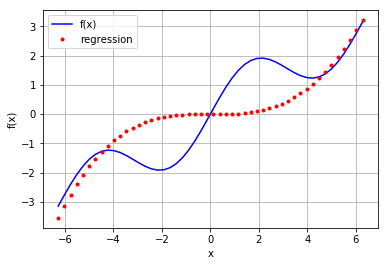

In [124]:
plt.plot(x,f(x),'b',label='f(x)')
plt.plot(x,ry,'r.',label='regression')
plt.legend(loc=0)
plt.grid(True)
plt.xlabel('x')
plt.ylabel('f(x)')#自定义函数效果并不好

* 噪声数据：回归也可以处理带有噪声的数据，为了描述，我们让自变量和因变量均带有噪声的数据。

Text(0,0.5,'f(x)')

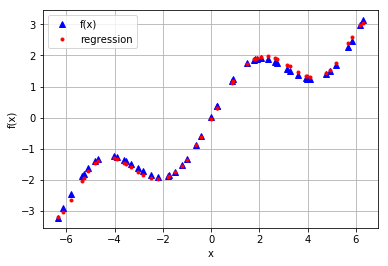

In [126]:
xn=np.linspace(-2*np.pi,2*np.pi,50)
xn=xn+0.15*np.random.standard_normal(len(xn))
yn=f(xn)+0.25*np.random.standard_normal(len(xn))
#我们让自变量和因变量均带有噪声的数据
reg=np.polyfit(xn,yn,7)
ry=np.polyval(reg,xn)
plt.plot(xn,f(xn),'b^',label='f(x)')
plt.plot(xn,ry,'r.',label='regression')
plt.legend(loc=0)
plt.grid(True)
plt.xlabel('x')
plt.ylabel('f(x)')
#这样的回归结果与原始回归结果比较类似，从某种程度上，回归过程进行了噪声的平均

* 非排序的数据：数据未排序不会影响回归的结果。

In [24]:
xu=np.random.rand(50)*4*np.pi-2*np.pi
yu=f(xu)
print(xu[:10].round(2))
print(yu[:10].round(2))
#linspace是排序的，random是未排序的

[ 4.19  4.42 -1.12  2.27  5.68 -4.63 -3.98 -3.22 -2.84  1.46]
[ 1.23  1.25 -1.46  1.9   2.27 -1.32 -1.25 -1.53 -1.72  1.72]


Text(0,0.5,'f(x)')

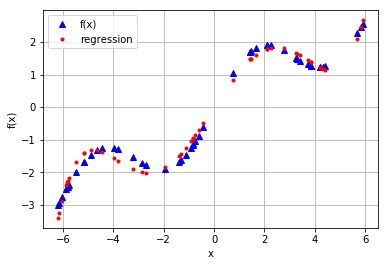

In [26]:
reg=np.polyfit(xu,yu,5)
ry=np.polyval(reg,xu)
plt.plot(xu,yu,'b^',label='f(x)')
plt.plot(xu,ry,'r.',label='regression')
plt.legend(loc=0)
plt.grid(True)
plt.xlabel('x')
plt.ylabel('f(x)')
#数据未排序，结果依然类似

最小二乘方法可以被应用于多维情形。估计多维的曲面最小二乘，我们需要的自变量也应当是一个平面。

In [128]:
def fm(x,y):
    return np.sin(x)+0.25*x+np.sqrt(y)+0.05*y**2

In [129]:
x=np.linspace(0,10,20)
y=np.linspace(0,10,20)
X,Y=np.meshgrid(x,y)#设置平面的点的组合
Z=fm(X,Y)
x=X.flatten()#降到一维,默认是按横的方向降
y=Y.flatten()

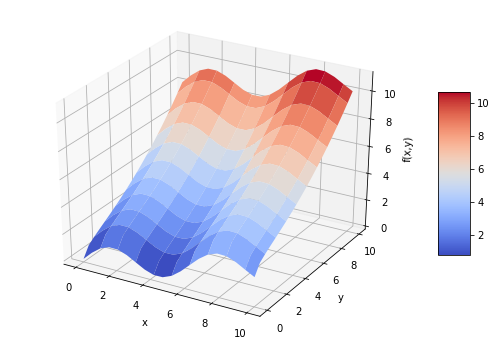

In [132]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib as mpl
fig=plt.figure(figsize=(9,6))
ax=fig.gca(projection='3d')
surf=ax.plot_surface(X,Y,Z,rstride=2,cstride=2,cmap=mpl.cm.coolwarm,linewidth=0.5,antialiased=True)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('f(x,y)')
fig.colorbar(surf,shrink=0.5,aspect=5)
#函数的图像

In [133]:
matrix=np.zeros((len(x),6+1))
matrix[:,6]=np.sqrt(y)
matrix[:,5]=np.sin(x)
matrix[:,4]=y**2
matrix[:,3]=x**2
matrix[:,2]=y
matrix[:,1]=x
matrix[:,0]=1
#设置的基函数矩阵,7个基函数

In [135]:
from pandas.core import datetools
import statsmodels.api as sm
#库statsmodels提供了一个更一般和有用的OLS函数进行最小二乘回归，这个函数可以应用于一维的问题，也可以应用于多维
#使用OLS函数的另一个优势是提供了更多的回归及其结果的信息

In [136]:
model=sm.OLS(fm(x,y),matrix).fit()

In [137]:
model.rsquared

1.0

In [138]:
a=model.params

In [139]:
a

array([ 1.54043445e-15,  2.50000000e-01,  3.05119054e-15, -6.07153217e-17,
        5.00000000e-02,  1.00000000e+00,  1.00000000e+00])

In [141]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 3.399e+30
Date:                Sat, 27 Oct 2018   Prob (F-statistic):               0.00
Time:                        19:26:53   Log-Likelihood:                 12286.
No. Observations:                 400   AIC:                        -2.456e+04
Df Residuals:                     393   BIC:                        -2.453e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        1.54e-15   2.86e-15      0.539      0.590   -4.08e-15    7.16e-15
x1             0.2500   7.42e-16   3.37e+14      0.000       0.250       0.250
x2          3.051e-15   2.42e-15      1.261      0.208   -1.71e-15    7.81e-15
x3         -6.072e-17   7.13e-17     -0.851      0.395   -2.01e-16    7.95e-17
x4             0.0500   1.26e-16   3.98e+14      0.000       0.050       0.050
x5             1.0000   8.89e-16   1.13e+15      0.000       1.000       1.000
x6             1.0000   4.74e-15   2.11e+14      0.000       1.000       1.000
==============================================================================
Omnibus:                       24.316   Durbin-Watson:                   0.121
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               12.548
Skew:                          -0.248   Prob(JB):                      0.00188
Kurtosis:                       2.288   Cond. No.                         587.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [142]:
#函数reg_func给出给定的回归参数下函数的值，以此可以得到回归函数的估计结果
def reg_func(a,x,y):
    f6=a[6]*np.sqrt(y)
    f5=a[5]*np.sin(x)
    f4=a[4]*y**2
    f3=a[3]*x**2
    f2=a[2]*y
    f1=a[1]*x
    f0=a[0]*1
    return (f6+f5+f4+f3+f2+f1+f0)

In [143]:
RZ=reg_func(a,X,Y)

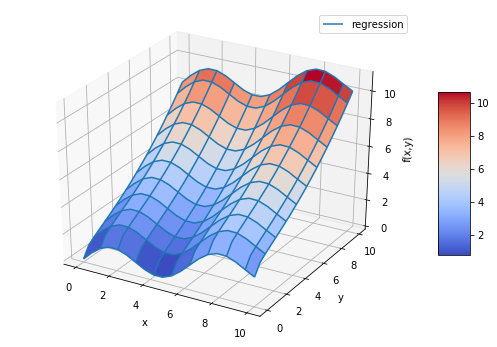

In [144]:
fig=plt.figure(figsize=(9,6))
ax=fig.gca(projection='3d')
surf1=ax.plot_surface(X,Y,Z,rstride=2,cstride=2,cmap=mpl.cm.coolwarm,linewidth=0.5,antialiased=True)
surf2=ax.plot_wireframe(X,Y,RZ,rstride=2,cstride=2,label='regression')#回归的结果，网格线的形式
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('f(x,y)')
ax.legend()
fig.colorbar(surf,shrink=0.5,aspect=5)

函数近似的方法还包括插值法，插值法一般适用于低维的问题，给定一组观测值（在x轴方向进行排序），基本的思想是对两个点之间的数据做回归，得到的结果是分段定义的函数可以较好的拟合原始函数，同时函数在数据点上是连续可微的，连续可微需要至少三次插值，即cubic spline。但是这个方法也可以应用于一般的二维甚至是线性的插值。

In [145]:
import scipy.interpolate as spi

In [167]:
x=np.linspace(-2*np.pi,2*np.pi,25)
ipo=spi.splrep(x,f(x),k=1)
#splrep函数和splev函数处理回归系数的估计和回归结果的拟合
#参数：x,排序的x坐标，y是对应的y坐标，w,应用于y的权重，xb,xe是拟合的区间
#k,拟合阶数，s，平滑参数因子，full_out_put=True,返回更多的结果
#quite=True忽略消息
#返回值是A tuple (t,c,k) containing the vector of knots, the B-spline
#coefficients, and the degree of the spline.
#ipo返回值的t,knots是x的linspace的点

In [168]:
iy=spi.splev(x,ipo)
#参数：x是排序的x坐标，tck是由splrep返回的参数，der导数的阶数，ext是如果x不在knot序列中的行为

Text(0,0.5,'f(x)')

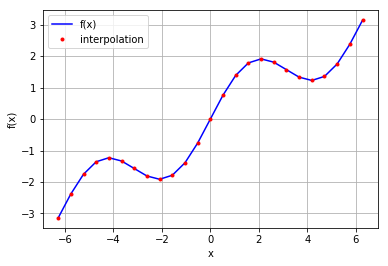

In [169]:
plt.plot(x,f(x),'b',label='f(x)')
plt.plot(x,iy,'r.',label='interpolation')
plt.legend(loc=0)
plt.grid(True)
plt.xlabel('x')
plt.ylabel('f(x)')

In [170]:
np.allclose(f(x),iy)#插值法定位已知点进行插值，所以已知的点必然是完全一样的

True

In [171]:
xd=np.linspace(1.0,3.0,50)#选定中间的一小段范围
lyd=spi.splev(xd,ipo)

Text(0,0.5,'f(x)')

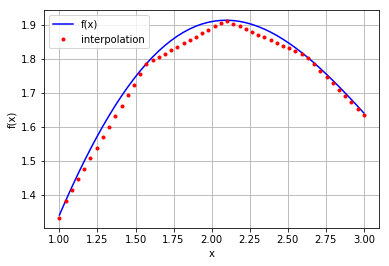

In [172]:
plt.plot(xd,f(xd),'b',label='f(x)')
plt.plot(xd,lyd,'r.',label='interpolation')
plt.legend(loc=0)
plt.grid(True)
plt.xlabel('x')
plt.ylabel('f(x)')#在knots与knots之间，是线性的插值

Text(0,0.5,'f(x)')

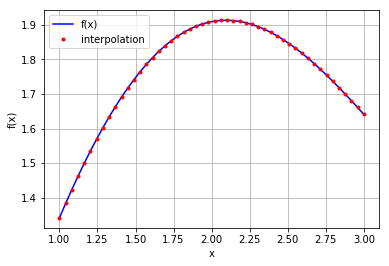

In [173]:
ipo=spi.splrep(x,f(x),k=3)
iyd=spi.splev(xd,ipo)
plt.plot(xd,f(xd),'b',label='f(x)')
plt.plot(xd,iyd,'r.',label='interpolation')
plt.legend(loc=0)
plt.grid(True)
plt.xlabel('x')
plt.ylabel('f(x)')

In [175]:
np.allclose(f(xd),iyd)#三次样条插值的样本点处并不完美

False

In [176]:
np.sum((f(xd)-iyd)**2)/len(xd)#MSE很小

1.1349319851436252e-08

# 凸优化

优化问题在金融中有广泛的应用，如以市场数据校正期权的定价模型，效用最大化等问题。凸优化是优化问题中的一个子类，凸函数的局部最优解就是全局最优解，但是，实际问题中凸函数并不是最常见的。在这里，我们定义一个非凸函数，分别来求解局部最优和全局最优，并寻求以合理的初始参数和优化方法逼近全局最优。

In [178]:
def fm(x,y):
    return (np.sin(x)+0.05*x**2+np.sin(y)+0.05*y**2)

In [179]:
x=np.linspace(-10,10,50)
y=np.linspace(-10,10,50)
X,Y=np.meshgrid(x,y)
Z=fm(X,Y)

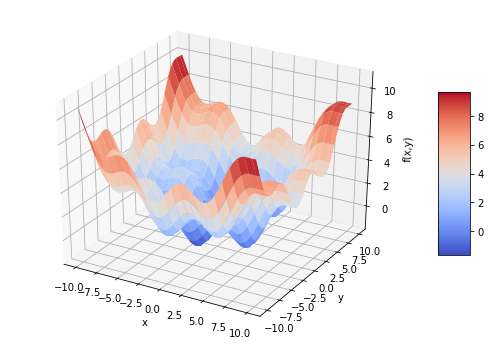

In [181]:
fig=plt.figure(figsize=(9,6))
ax=fig.gca(projection='3d')
surf=ax.plot_surface(X,Y,Z,rstride=2,cstride=2,cmap=mpl.cm.coolwarm,linewidth=0.5,antialiased=True)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('f(x,y)')
fig.colorbar(surf,shrink=0.5,aspect=5)

In [200]:
#为了更仔细地观察初始化最小化过程时后台发生的情况，我们改善原函数，通过一个选项输出当前参数值和函数值：
import scipy.optimize as spo
def fo(x):
    z=np.sin(x[0])+0.05*x[0]**2+np.sin(x[1])+0.05*x[1]**2
    if output==True:#可选择是否输出
        print("%8.4f %8.4f %8.4f" % (x[0],x[1],z))
    return z

In [203]:
output=True
spo.brute(fo,((-10,10.1,5),(-10,10.1,5)),finish=None)#提供x值范围（-10,10.1,5 ）会得到-10,-5,0,5,10这5个测试值 
#返回的是中间的计算值(x[0],x[1],z))和最终在这几个测试值中间，最优化的(x[0],x[1])

-10.0000 -10.0000  11.0880
-10.0000 -10.0000  11.0880
-10.0000  -5.0000   7.7529
-10.0000   0.0000   5.5440
-10.0000   5.0000   5.8351
-10.0000  10.0000  10.0000
 -5.0000 -10.0000   7.7529
 -5.0000  -5.0000   4.4178
 -5.0000   0.0000   2.2089
 -5.0000   5.0000   2.5000
 -5.0000  10.0000   6.6649
  0.0000 -10.0000   5.5440
  0.0000  -5.0000   2.2089
  0.0000   0.0000   0.0000
  0.0000   5.0000   0.2911
  0.0000  10.0000   4.4560
  5.0000 -10.0000   5.8351
  5.0000  -5.0000   2.5000
  5.0000   0.0000   0.2911
  5.0000   5.0000   0.5822
  5.0000  10.0000   4.7471
 10.0000 -10.0000  10.0000
 10.0000  -5.0000   6.6649
 10.0000   0.0000   4.4560
 10.0000   5.0000   4.7471
 10.0000  10.0000   8.9120


array([0., 0.])

在给定的函数初始参数化条件下，最优化参数值是x=y=0。回顾前面的输出可以看出，结果函数值也为0。第一次参数化相当粗糙，我们对两个输人参数均使用5的步距。这当然有很大的微调空间，得到更好的结果。

In [204]:
output=False
opt1=spo.brute(fo,((-10,10.1,0.1),(-10,10.1,0.1)),finish=None)
opt1

array([-1.4, -1.4])

In [206]:
fm(opt1[0],opt1[1])

-1.7748994599769203

fmin函数的输入是需要最小化的函数和起始参数值。此外，可以定义输入参数宽容度和函数值宽容度， 以及最大迭代及函数调用次数。

In [207]:
output = True
opt2 = spo.fmin(fo, opt1, xtol=0.001, ftol=0.001, maxiter=15, maxfun=20)#起始参数值使用的是brute最优化的结果
opt2
#函数最多调用20次截止

 -1.4000  -1.4000  -1.7749
 -1.4700  -1.4000  -1.7743
 -1.4000  -1.4700  -1.7743
 -1.3300  -1.4700  -1.7696
 -1.4350  -1.4175  -1.7756
 -1.4350  -1.3475  -1.7722
 -1.4088  -1.4394  -1.7755
 -1.4438  -1.4569  -1.7751
 -1.4328  -1.4427  -1.7756
 -1.4591  -1.4208  -1.7752
 -1.4213  -1.4347  -1.7757
 -1.4235  -1.4096  -1.7755
 -1.4305  -1.4344  -1.7757
 -1.4168  -1.4516  -1.7753
 -1.4305  -1.4260  -1.7757
 -1.4396  -1.4257  -1.7756
 -1.4259  -1.4325  -1.7757
 -1.4259  -1.4241  -1.7757
 -1.4304  -1.4177  -1.7757
 -1.4270  -1.4288  -1.7757


array([-1.42702972, -1.42876755])

In [208]:
fm(opt2[0],opt2[1])

-1.7757246992239009

In [210]:
#不同的初始参数通过局部最优化可能得到不同的结果
output=False
spo.fmin(fo,(2.0,2.0),maxiter=250)
#在许多凸优化问题中，建议在局部优化之前进行全局优化。主要原因是局部凸优化算法很容易陷人某个局部最小值（所谓的盆地跳跃 ）
#而忽略“更好”的局部最小值和全局最小值。下面可以看到将初始参数化设置为x=y=2得出高于0的“最小”值

Optimization terminated successfully.
         Current function value: 0.015826
         Iterations: 46
         Function evaluations: 86


array([4.2710728 , 4.27106945])

在实际经济金融领域的运用中，有约束优化往往更加常见，比如在效用最大化问题中，通常的约束条件是预算。我们使用scipy.optimize.minimize 函数解决上述问题。除了需要最小化的函数之外，这个函数还以公式和不等式（以字典对象列表的形式）和参数范围（以元组对象元组的形式）作为输入。

In [215]:
from math import sqrt
def Eu(x):#要优化的函数
    return -(0.5*sqrt(x[0]*15+x[1]*5)+0.5*sqrt(x[0]*5+x[1]*12))
cons=({'type':'ineq','fun':lambda x:100-x[0]*10-x[1]*10})#约束条件是字典形式的
bnds=((0,1000),(0,1000))#参数范围

In [216]:
result=spo.minimize(Eu,[5,5],method='SLSQP',bounds=bnds,constraints=cons)#[5,5]初始参数

In [217]:
result

     fun: -9.700883611487832
     jac: array([-0.48508096, -0.48489535])
 message: 'Optimization terminated successfully.'
    nfev: 21
     nit: 5
    njev: 5
  status: 0
 success: True
       x: array([8.02547122, 1.97452878])

In [218]:
result['x']

array([8.02547122, 1.97452878])

In [219]:
result['fun']

-9.700883611487832

# 积分

在估值和期权定价时，积分是一个重要的数学工具。 这来源于一个事实：衍生物的风险中性价值一般可以用鞍测度下的预期折现收益来表示。这一预期在离散情况下是个总和。在连续情况下是一个积分。scipy.integrate子库提供了数值积分所用的不同函数。

In [220]:
import scipy.integrate as sci

In [221]:
def f(x):
    return np.sin(x)+0.5*x

In [223]:
a=0.5
b=9.5
x=np.linspace(0,10)
y=f(x)
## 我们感兴趣的是［0.5, 9.5]区间内的积分

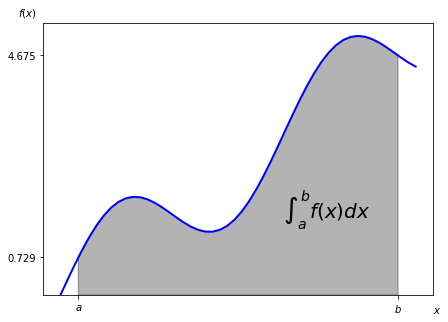

In [225]:
#绘制黎曼积分的积分区域图像
from matplotlib.patches import Polygon
fig,ax=plt.subplots(figsize=(7,5))
plt.plot(x,y,'b',lw=2)
plt.ylim(ymin=0)
Ix=np.linspace(a,b)
Iy=f(Ix)
verts=[(a,0)]+list(zip(Ix,Iy))+[(b,0)]
poly=Polygon(verts,facecolor='0.7',edgecolor='0.5')
ax.add_patch(poly)
plt.text(0.75*(a+b),1.5,r"$\int_a^b f(x)dx$",horizontalalignment='center',fontsize=20)
plt.figtext(0.9,0.075,'$x$')
plt.figtext(0.075,0.9,'$f(x)$')
ax.set_xticks((a,b))
ax.set_xticklabels(('$a$','$b$'))
ax.set_yticks([f(a),f(b)])

scipy中提供了三种函数数值积分的方法：
* fixed_quad fixde Gaussian quadrature固定高斯求积
* quad adaptive quadrature自适应求积
* romberg Romberg integration龙贝格积分

In [226]:
sci.fixed_quad(f,a,b)[0]

24.366995967084602

In [227]:
sci.quad(f,a,b)[0]

24.374754718086752

In [228]:
sci.romberg(f,a,b)

24.374754718086713

还有一些积分函数以输入参数为list或ndarray对象。这种函数的例子包括使用trapezoidal梯形法则的trapz，和实现辛普森法则的simps。

In [229]:
xi=np.linspace(0.5,9.5,25)
sci.trapz(f(xi),xi)

24.352733271544516

In [230]:
sci.simps(f(xi),xi)

24.37496418455075

通过模拟求函数值：在积分区间内取I个随机的x值，并计算每个随机x值处的积分函数值。加总所有函数值并求其平均值， 就可以得到积分区间中的平均函数值。将该值乘以积分区间长度， 可以得出估算的积分值。

In [232]:
for i in range(1,20):
    np.random.seed(1000)
    x=np.random.random(i*10)*(b-a)+a
    print(np.sum(f(x))/len(x)*(b-a))
    #蒙特卡洛估算积分值如何随着提取的随机数个数的增加而收敛.即使提取的随机数个数较少，估算值也已经相当接近

24.804762279331463
26.522918898332378
26.265547519223976
26.02770339943824
24.99954181440844
23.881810141621663
23.527912274843253
23.507857658961207
23.67236746066989
23.679410416062886
24.424401707879305
24.239005346819056
24.115396924962802
24.424191987566726
23.924933080533783
24.19484212027875
24.117348378249833
24.100690929662274
23.76905109847816


# 符号运算

In [235]:
import sympy as sy#为使用Python进行符号计算，我们首先引入SymPy库

In [237]:
#SymPy引入了新的对象的类，基础类是Symbol类。与NumPy类似，SymPy提供了一系列基础函数定义
#可以使用Symbol对象定义任意的函数并进行化简
x=sy.Symbol('x')
y=sy.Symbol('y')

In [239]:
type(x)

sympy.core.symbol.Symbol

In [240]:
sy.sqrt(x)

sqrt(x)

In [241]:
3+sy.sqrt(x)-4**2

sqrt(x) - 13

In [242]:
f=x**2+3+0.5*x**2+3/2
sy.simplify(f)

1.5*x**2 + 4.5

SymPy为数学表达式提供了 3 个基本的渲染器：
1. 基于 LaTex 的渲染器：类似手写体
2. 基于unicode 的渲染器：不容易乱码
3. 基于 ASCII 的渲染器：常用

In [243]:
sy.init_printing(pretty_print=False,use_unicode=False)#初始设置：不美化，不用unicode

In [244]:
print(sy.pretty(f))#美化f的表达

     2      
1.5*x  + 4.5


In [246]:
print(sy.pretty(sy.sqrt(x)+0.5))

  ___      
\/ x  + 0.5


In [247]:
#长字符串的表示通过符号计算变得简单
pi_str=str(sy.N(sy.pi,400000))
pi_str[:40]

'3.14159265358979323846264338327950288419'

In [248]:
pi_str[-40:]#最后40位

'8245672736856312185020980470362464176198'

In [249]:
pi_str.find('111272')#寻找里面含有的数据

366713

In [250]:
pi_str.find('111274')#如果不存在，返回-1

-1

In [251]:
# SymPy的长处之一是解方程

In [253]:
sy.solve(x**2-1)#默认方程=0，求解

[-1, 1]

In [254]:
sy.solve(x**2-1-3)

[-2, 2]

In [255]:
sy.solve(x**3+0.5*x**2-1)

[0.858094329496553, -0.679047164748276 - 0.839206763026694*I, -0.679047164748276 + 0.839206763026694*I]

In [256]:
sy.solve(x**2+y**2)#返回的是复数

[{x: -I*y}, {x: I*y}]

In [257]:
a,b=sy.symbols('a b')

In [259]:
print(sy.pretty(sy.Integral(sy.sin(x)+0.5*x,(x,a,b))))

  b                    
  /                    
 |                     
 |  (0.5*x + sin(x)) dx
 |                     
/                      
a                      


In [260]:
#使用 integrate 可以得出积分函数的反导数（不定积分）
int_func=sy.integrate(sy.sin(x)+0.5*x,x)
print(sy.pretty(int_func))

      2         
0.25*x  - cos(x)


In [261]:
#使用subs和evalf函数来求值。计算定积分并求值
Fb=int_func.subs(x,9.5).evalf()
Fa=int_func.subs(x,0.5).evalf()
Fb-Fa

24.3747547180867

In [262]:
int_func_limits=sy.integrate(sy.sin(x)+0.5*x,(x,a,b))
print(sy.pretty(int_func_limits))
int_func_limits.subs({a:0.5,b:9.5}).evalf()

        2         2                  
- 0.25*a  + 0.25*b  + cos(a) - cos(b)


24.3747547180868

In [263]:
sy.integrate(sy.sin(x)+0.5*x,(x,0.5,9.5))

24.3747547180867

In [264]:
int_func.diff()#求导数

0.5*x + sin(x)

In [273]:
f=(sy.sin(x)+0.05*x**2+sy.sin(y)+0.05*y**2)
del_x=sy.diff(f,x)#对x求偏导

In [266]:
del_x

0.1*x + cos(x)

In [267]:
del_y=sy.diff(f,y)#对x求偏导
del_y

0.1*y + cos(y)

In [268]:
#最小值的点应该满足x,y偏导均为0
xo=sy.nsolve(del_x,-1.5)#初始值-1.5
yo=sy.nsolve(del_y,-1.5)#nsolve是求数值解的方式
#为什么不用solve而用nsolve,是因为计算机只能求解最简单的方程，难度大的方程不会计算，只能计算数值近似解

In [270]:
xo

-1.42755177876459

In [271]:
yo

-1.42755177876459

In [275]:
result=f.subs({x:xo,y:yo}).evalf()

In [276]:
result

-1.77572565314742

In [277]:
xo=sy.nsolve(del_x,1.5)#更换初始值，最优化结果可能落入盆地，而互相不一致
yo=sy.nsolve(del_y,1.5)
result=f.subs({x:xo,y:yo}).evalf()
result

2.27423381055640

本文介绍了金融中比较重要的数学问题和工具。
* 函数近似在很多金融领域中都有应用，比如收益率曲线的插值以及回归为基础的美式期权定价的Monte-Carlo方法
* 凸优化技术也是金融中经常需要的，应用于例如期权定价模型，隐含波动率模型优化等。
* 数值积分是期权和衍生品定价的核心。如果获得了一组随机过程的风险中性概率测度，期权定价问题就变成了一个基于风险中性测度求期权支付的数学期望并折现到今天的问题。
* 使用SymPy进行符号计算的方法。对于很多数学操作，例如积分、微分和求解方程组，符号计算被证明是一项有用和有效的工具。